In [8]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Exercise 2: Creating Composite Features

In [9]:
url = "https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%204%20-%20Data%20Understanding/W4D4%20-%20Data%20Preprocessing%20&%20T/Superstore%20Sales%20Data.zip"

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

In [27]:
sales_data = pd.read_csv('./data/superstore_dataset2011-2015.csv', encoding='latin1')
sales_data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


<function matplotlib.pyplot.show(close=None, block=None)>

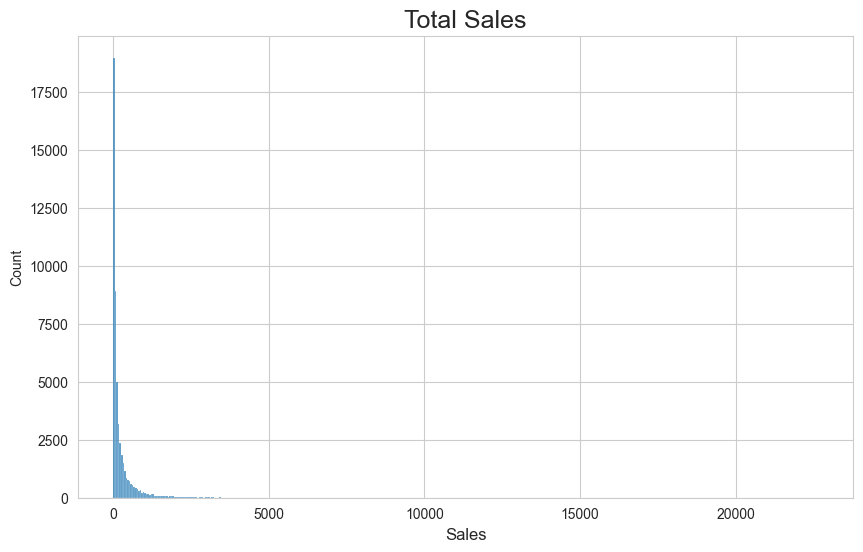

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(sales_data['Sales'])
plt.title('Total Sales', size=18)
plt.xlabel('Sales', size=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

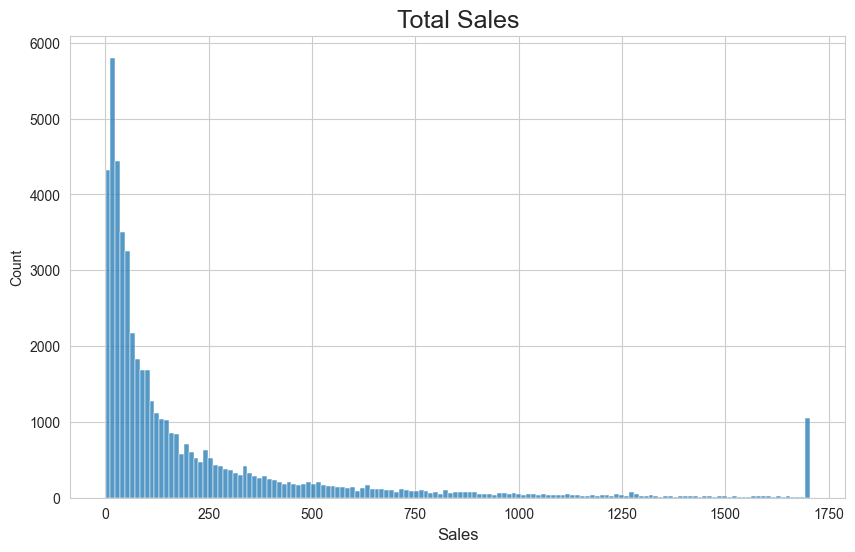

In [29]:
# Removing Outliers From Scaled
upper_cap = sales_data['Sales'].quantile(0.98)

sales_data['Sales'] = sales_data['Sales'].clip(upper=upper_cap)
plt.figure(figsize=(10,6))
sns.histplot(sales_data['Sales'])
plt.title('Total Sales', size=18)
plt.xlabel('Sales', size=12)
plt.show

In [30]:
mm_scaler = MinMaxScaler()
sales_data['Sales_Normalized'] = mm_scaler.fit_transform(sales_data[['Sales']])
sales_data['Profit_Normalized'] = mm_scaler.fit_transform(sales_data[['Profit']])

sales_data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Sales_Normalized,Profit_Normalized
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,226.965575,3.476545,0.142908,28.610982,26.375915,0.132894,0.441907
std,14806.29199,32063.693350,349.650393,2.278766,0.212280,174.340972,57.296804,0.205131,0.011623
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.000000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000,0.017785,0.440000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000,0.049638,0.440616
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000,0.147026,0.442454
max,51290.00000,99301.000000,1704.967920,14.000000,0.850000,8399.976000,933.570000,1.000000,1.000000
